In [41]:
import pandas as pd

try:
  df = pd.read_parquet('occupations.parquet')
  print("Imported")

except FileNotFoundError:
  print("Error: occupations.csv not found")

except Exception as e:
  print(f"An error occurred: {e}")


Imported


In [42]:
df.head()

,Occupation,Wage,Growth,Risk,Risk_voted,Score,Popularity
0,Computer Programmers,99700,-9.60,70.12,60.91,3.80,100
1,Lawyers,145760,5.20,22.98,34.55,7.70,71
2,Web Developers,84960,9.00,53.36,69.02,5.40,62
3,Graphic Designers,58910,2.50,47.11,70.87,4.10,55
4,Accountants and Auditors,79880,5.80,69.08,59.63,5.20,53


# Wages

In [43]:
df["Wage"].describe()

# Median wages are 63,540

,Wage
count,587.000000
mean,74268.074957
std,38668.216268
min,29260.000000
25%,47010.000000
50%,63540.000000
75%,92720.000000
max,236000.000000


In [44]:
df[df["Wage"] > 200000].sort_values(by="Wage", ascending=False)

# The top class of earnings are made by people in medical field

,Occupation,Wage,Growth,Risk,Risk_voted,Score,Popularity
145,Sports Medicine Physicians,236000,3.90,0.00,16.43,8.50,5
361,Preventive Medicine Physicians,236000,3.90,0.00,42.31,7.30,3
364,Physical Medicine and Rehabilitation Physicians,236000,3.90,0.00,25.74,8.20,3
383,Allergists and Immunologists,236000,3.90,7.73,32.50,7.80,3
409,Urologists,236000,3.90,0.00,21.74,8.50,3
491,Hospitalists,236000,3.90,0.00,28.33,8.20,3
41,Psychiatrists,226880,7.60,0.00,26.63,8.60,10
87,Family Medicine Physicians,224640,4.80,18.61,14.20,8.00,7
172,Neurologists,224260,6.80,0.00,24.08,8.00,5
57,General Internal Medicine Physicians,223310,3.40,0.00,32.99,7.50,9


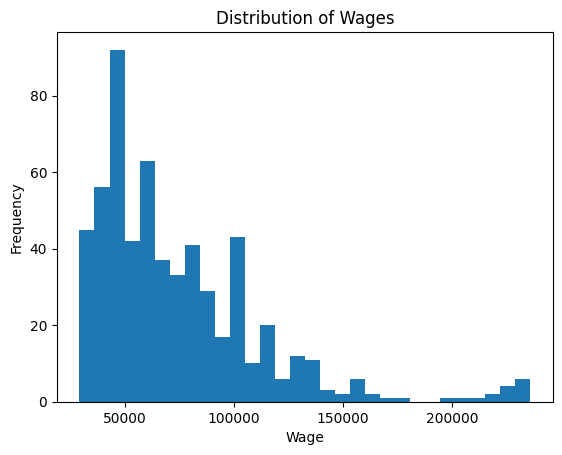

In [45]:
import matplotlib.pyplot as plt

try:
  df['Wage'].plot(kind='hist', bins=30, title='Distribution of Wages')
  plt.xlabel('Wage')
  plt.ylabel('Frequency')
  plt.show()

except KeyError:
  print("Error: 'Wage' column not found in the DataFrame")

except Exception as e:
  print(f"An error occurred while plotting: {e}")

# 80% of the jobs make less than 100k

In [46]:
df[df['Wage'] <= 16 * 40 * 4 * 12].sort_values(by="Wage")

# According to this data 16 is lowest wage we see entries starting

,Occupation,Wage,Growth,Risk,Risk_voted,Score,Popularity
380,"Cooks, Fast Food",29260,-13.70,100.00,75.57,1.40,3
229,Amusement and Recreation Attendants,29390,4.50,75.53,36.61,4.20,4
567,Shampooers,29530,9.50,69.81,70.83,3.70,1
175,Fast Food and Counter Workers,29540,5.70,96.21,92.10,2.50,5
241,Baristas,29540,5.70,74.23,64.58,3.40,4
78,Cashiers,29720,-10.60,87.61,94.35,1.40,7
469,Childcare Workers,30370,-1.30,32.38,19.55,4.80,3
470,Nannies,30370,-1.30,23.68,19.05,5.10,3
497,"Lifeguards, Ski Patrol, and Other Recreational...",30380,6.80,35.65,25.79,5.80,3


# Growth

In [55]:
df.sort_values(by="Growth", ascending=False)[:10]

# Nurses and Analysts have very high potential for growth but
# Analysts are at a high risk of being replaced by AI
# So its a high risk, high reward job

,Occupation,Wage,Growth,Risk,Risk_voted,Score,Popularity
22,Nurse Practitioners,126260,46.30,0.00,15.49,9.20,12
328,Clinical Data Managers,108020,36.00,52.14,62.50,6.30,3
14,Business Intelligence Analysts,108020,36.00,73.52,59.71,5.90,16
34,Information Security Analysts,120360,32.70,57.98,44.18,6.80,11
75,Physician Assistants,130020,28.50,0.00,30.82,8.70,7
294,Medical and Health Services Managers,110680,28.50,16.32,35.25,8.20,4
158,Anesthesiologist Assistants,130020,28.50,29.00,35.23,8.00,5
64,Computer and Information Research Scientists,145080,25.60,31.26,28.81,7.70,8
493,Physical Therapist Assistants,64080,25.40,14.89,34.32,7.30,3
182,Operations Research Analysts,83640,23.00,42.10,38.10,6.90,5


In [57]:
df.sort_values(by="Growth")[:10]

# All the things that are being replaced by smartphones are at negative growth
# and are at imminent risk

,Occupation,Wage,Growth,Risk,Risk_voted,Score,Popularity
408,Word Processors and Typists,46450,-38.00,100.00,81.45,1.30,3
244,Telephone Operators,38080,-26.40,100.00,85.12,0.70,4
533,"Switchboard Operators, Including Answering Ser...",36750,-25.20,100.00,82.14,0.90,1
105,Data Entry Keyers,37790,-25.00,100.00,90.63,1.30,6
555,Foundry Mold and Coremakers,44300,-24.60,93.73,61.11,2.10,1
556,"Patternmakers, Metal and Plastic",49670,-22.20,98.97,95.00,2.00,1
102,Telemarketers,34480,-21.50,97.49,90.18,0.90,6
475,Engine and Other Machine Assemblers,50270,-21.30,87.20,70.65,2.00,3
433,Manufactured Building and Mobile Home Installers,38980,-19.60,0.00,33.93,3.60,3
445,"Drilling and Boring Machine Tool Setters, Oper...",44620,-19.20,100.00,67.86,1.80,3


In [70]:
# Total number of jobs
total_jobs = df.shape[0]

# Count of jobs in each category
negative_growth = df[df["Growth"] < 0].shape[0]
stagnant_growth = df[(df["Growth"] >= 0) & (df["Growth"] < 10)].shape[0]
positive_growth = df[df["Growth"] >= 10].shape[0]

# Calculate percentages
negative_growth_pct = (negative_growth / total_jobs) * 100
stagnant_growth_pct = (stagnant_growth / total_jobs) * 100
positive_growth_pct = (positive_growth / total_jobs) * 100

# Generate report
report = f"""
Job Growth Analysis Report
--------------------------
Total Jobs Analyzed: {total_jobs}

1. Negative Growth (< 0)            : {negative_growth}({negative_growth_pct:.2f}%)
2. Stagnant Growth (0 ≤ Growth < 10): {stagnant_growth}({stagnant_growth_pct:.2f}%)
3. Positive Growth (≥ 10)           : {positive_growth}({positive_growth_pct:.2f}%)
"""

print(report)



Job Growth Analysis Report
--------------------------
Total Jobs Analyzed: 587

1. Negative Growth (< 0)            : 115(19.59%)
2. Stagnant Growth (0 ≤ Growth < 10): 382(65.08%)
3. Positive Growth (≥ 10)           : 90(15.33%)



In [74]:
df["Growth"].median()  # Most jobs are stagnant

5.0

<Axes: ylabel='Frequency'>

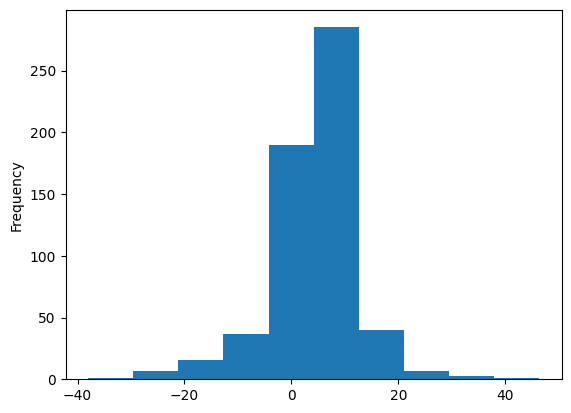

In [84]:
df["Growth"].astype(float).plot(kind='hist')  # Most jobs are stagnant

# Risk

In [89]:
df.sort_values(by="Risk").head(10)

# Medical field is the most risk free

,Occupation,Wage,Growth,Risk,Risk_voted,Score,Popularity
409,Urologists,236000,3.90,0.00,21.74,8.50,3
41,Psychiatrists,226880,7.60,0.00,26.63,8.60,10
489,Neuropsychologists,117750,5.00,0.00,22.95,7.80,3
491,Hospitalists,236000,3.90,0.00,28.33,8.20,3
226,Recreational Therapists,57120,4.30,0.00,23.21,6.50,4
223,Nurse Midwives,129650,7.10,0.00,21.88,8.10,4
222,Emergency Medical Technicians,38930,6.10,0.00,14.42,7.00,4
221,Paramedics,53180,5.90,0.00,11.83,7.60,4
509,"Nursing Instructors and Teachers, Postsecondary",80780,17.90,0.00,42.65,7.50,1
574,"Anthropology and Archeology Teachers, Postseco...",93650,3.80,0.00,28.41,7.00,1


In [90]:
df.sort_values(by="Risk", ascending=False).head(10)  #Drone and Robot automation jobs

,Occupation,Wage,Growth,Risk,Risk_voted,Score,Popularity
193,Refuse and Recyclable Material Collectors,45760,2.30,100.00,71.27,2.20,4
408,Word Processors and Typists,46450,-38.00,100.00,81.45,1.30,3
474,"Lathe and Turning Machine Tool Setters, Operat...",47110,-11.40,100.00,51.56,1.80,3
156,Postal Service Mail Carriers,56330,-3.00,100.00,54.61,2.80,5
243,Bill and Account Collectors,44250,-9.50,100.00,67.58,1.80,4
244,Telephone Operators,38080,-26.40,100.00,85.12,0.70,4
444,Sewing Machine Operators,34440,-13.20,100.00,69.87,1.30,3
443,Helpers--Production Workers,36700,-8.30,100.00,76.19,1.10,3
440,"Milling and Planing Machine Setters, Operators...",47200,-12.90,100.00,80.95,1.00,3
439,Gem and Diamond Workers,47450,-3.70,100.00,80.00,2.60,3


In [91]:
df[df["Wage"] >= 60000].sort_values(by="Risk", ascending=False).head(10)

# These are the jobs that earn median wage and are at high risk to get replaced

,Occupation,Wage,Growth,Risk,Risk_voted,Score,Popularity
133,Credit Analysts,79420,-3.90,100.00,68.17,3.00,5
151,Court Reporters and Simultaneous Captioners,63940,1.80,100.00,75.88,2.30,5
155,Technical Writers,80050,4.00,93.58,54.46,4.20,5
372,Cytotechnologists,60780,5.30,93.55,73.53,3.90,3
452,"Bus Drivers, Transit and Intercity",60170,5.20,91.98,58.57,4.10,3
139,Paralegals and Legal Assistants,60970,1.20,89.82,63.71,3.30,5
134,Budget Analysts,84940,3.90,88.20,62.28,4.00,5
457,"Railroad Brake, Signal, and Switch Operators a...",63540,1.50,86.53,68.75,3.20,3
125,Customs Brokers,75670,5.40,85.36,61.43,4.60,5
371,Histotechnologists,60780,5.30,84.60,55.00,4.90,3


In [136]:
bins = [-1, 20, 40, 60, 80, 101]
labels = ["1 Minimal Risk", "2 Low Risk", "3 Moderate Risk", "4 High Risk", "5 Imminent Risk"]


# Categorize risk using pd.cut
df["Risk Category"] = pd.cut(df["Risk"], bins=bins, labels=labels, include_lowest=True)
df["Risk Category"].value_counts().sort_index(ascending=False)

#200 jobs are on the verge of being automated (about 40%)

,count
Risk Category,
5 Imminent Risk,105
4 High Risk,95
3 Moderate Risk,145
2 Low Risk,102
1 Minimal Risk,140


In [137]:
bins = [29000, 50000, 85000, 125000, 175000, 236000]
labels = ["1 Low Income", "2 Lower Middle Income", "3 Middle Income", "4 Upper Middle Income", "5 High Income"]

df["Wage Category"] = pd.cut(df["Wage"], bins=bins, labels=labels, include_lowest=True)
df["Wage Category"].value_counts().sort_index()

# Over 70.7% of jobs in usa are middle class and lower middle class income
# Middle Income jobs make up 19.9%
# only 9.4% of jobs fall into Upper Middle and High Income brackets

,count
Wage Category,
1 Low Income,194
2 Lower Middle Income,221
3 Middle Income,117
4 Upper Middle Income,40
5 High Income,15


In [164]:
crosstab =
crosstab["% Jobs at High Risk"] = round((crosstab["4 High Risk"] + crosstab["5 Imminent Risk"]) / crosstab.sum(axis=1) * 100, 2)
crosstab

Risk Category,1 Minimal Risk,2 Low Risk,3 Moderate Risk,4 High Risk,5 Imminent Risk,% Jobs at High Risk
Wage Category,,,,,,
1 Low Income,8,15,48,46,77,63.40
2 Lower Middle Income,59,36,62,36,28,28.96
3 Middle Income,45,33,29,10,0,8.55
4 Upper Middle Income,14,18,6,2,0,5.00
5 High Income,14,0,0,1,0,6.67


# Popularity

In [166]:
df.sort_values(by="Popularity", ascending=False).head(10)

#Computer Programmers is the most sought after job, followed by lawayers and computer programmers again
# Engineers are the most sought after jobs

,Occupation,Wage,Growth,Risk,Risk_voted,Score,Popularity,Risk Category,Wage Category
0,Computer Programmers,99700,-9.60,70.12,60.91,3.80,100,4 High Risk,3 Middle Income
1,Lawyers,145760,5.20,22.98,34.55,7.70,71,2 Low Risk,4 Upper Middle Income
2,Web Developers,84960,9.00,53.36,69.02,5.40,62,3 Moderate Risk,2 Lower Middle Income
3,Graphic Designers,58910,2.50,47.11,70.87,4.10,55,3 Moderate Risk,2 Lower Middle Income
4,Accountants and Auditors,79880,5.80,69.08,59.63,5.20,53,4 High Risk,2 Lower Middle Income
5,Mechanical Engineers,99510,11.00,30.38,31.66,7.90,39,2 Low Risk,3 Middle Income
6,Computer Systems Engineers/Architects,104920,10.80,33.59,45.03,7.10,37,2 Low Risk,3 Middle Income
7,Civil Engineers,95890,6.50,0.00,28.61,8.50,33,1 Minimal Risk,3 Middle Income
8,Electrical Engineers,106950,9.10,25.29,27.82,8.10,32,2 Low Risk,3 Middle Income
9,Commercial Pilots,113080,5.70,55.11,41.30,6.20,31,3 Moderate Risk,3 Middle Income


In [167]:
df.sort_values(by="Popularity", ascending=True).head(10)

,Occupation,Wage,Growth,Risk,Risk_voted,Score,Popularity,Risk Category,Wage Category
586,Postmasters and Mail Superintendents,88670,-3.00,49.04,78.75,3.20,1,3 Moderate Risk,3 Middle Income
522,Medical Equipment Preparers,45280,5.70,73.93,58.93,4.10,1,4 High Risk,1 Low Income
523,First-Line Supervisors of Gambling Services Wo...,61210,5.20,58.94,83.33,4.80,1,3 Moderate Risk,2 Lower Middle Income
524,"Locker Room, Coatroom, and Dressing Room Atten...",33450,8.00,90.97,73.53,2.70,1,5 Imminent Risk,1 Low Income
525,"Shipping, Receiving, and Inventory Clerks",39780,-7.60,86.39,71.55,2.00,1,5 Imminent Risk,1 Low Income
526,"Pesticide Handlers, Sprayers, and Applicators,...",44070,5.10,71.52,61.84,3.20,1,4 High Risk,1 Low Income
527,First-Line Supervisors of Housekeeping and Jan...,46650,4.00,50.21,55.00,4.30,1,3 Moderate Risk,1 Low Income
528,Dining Room and Cafeteria Attendants and Barte...,31180,8.30,69.48,56.52,3.90,1,4 High Risk,1 Low Income
529,First-Line Supervisors of Food Preparation and...,38520,6.30,46.90,50.00,4.90,1,3 Moderate Risk,1 Low Income
521,Pharmacy Aides,36200,0.90,73.39,56.52,2.20,1,4 High Risk,1 Low Income


In [178]:
df[(df["Popularity"] > 50) & ((df["Risk Category"] == "4 High Risk") | (df["Risk Category"] == "5 Imminent Risk") )]

# Computer programmers and accountants who are very popular are prone to get automated

,Occupation,Wage,Growth,Risk,Risk_voted,Score,Popularity,Risk Category,Wage Category
0,Computer Programmers,99700,-9.60,70.12,60.91,3.80,100,4 High Risk,3 Middle Income
4,Accountants and Auditors,79880,5.80,69.08,59.63,5.20,53,4 High Risk,2 Lower Middle Income


In [186]:
df[(df["Popularity"] <= 50) & ((df["Risk Category"] == "1 Minimal Risk") | (df["Risk Category"] == "2 Low Risk")) & (df["Wage"] > 100000) & (df["Growth"] > 15)]

# On contrary jobs which are not popularbut are very good are as follows

,Occupation,Wage,Growth,Risk,Risk_voted,Score,Popularity,Risk Category,Wage Category
22,Nurse Practitioners,126260,46.30,0.00,15.49,9.20,12,1 Minimal Risk,4 Upper Middle Income
29,Veterinarians,119100,19.10,6.83,19.13,8.80,11,1 Minimal Risk,3 Middle Income
58,Computer and Information Systems Managers,169510,17.40,38.51,33.20,8.30,9,2 Low Risk,4 Upper Middle Income
64,Computer and Information Research Scientists,145080,25.60,31.26,28.81,7.70,8,2 Low Risk,4 Upper Middle Income
75,Physician Assistants,130020,28.50,0.00,30.82,8.70,7,1 Minimal Risk,4 Upper Middle Income
158,Anesthesiologist Assistants,130020,28.50,29.00,35.23,8.00,5,2 Low Risk,4 Upper Middle Income
294,Medical and Health Services Managers,110680,28.50,16.32,35.25,8.20,4,1 Minimal Risk,3 Middle Income


In [187]:
df.to_csv('occupations.csv', index=False)